In [1]:
import json
import matplotlib.pyplot as plt
import urllib.request as url
import pandas as pd

In [2]:
req = url.urlopen("https://api.covid19india.org/states_daily.json")

In [3]:
data = json.load(req)

In [4]:
states = pd.DataFrame(data['states_daily'])

In [5]:
states.shape

(1083, 42)

In [6]:
states.tail()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
1078,2,61,0,17,43,63,220,08-Mar-21,2021-03-08,0,...,0,Recovered,189,532,1,16606,0,113,26,221
1079,0,2,0,0,1,1,1,08-Mar-21,2021-03-08,0,...,0,Deceased,1,3,0,76,0,1,0,2
1080,2,118,0,22,41,105,390,09-Mar-21,2021-03-09,0,...,1,Confirmed,142,569,0,17873,0,147,49,188
1081,1,89,0,15,33,52,281,09-Mar-21,2021-03-09,0,...,1,Recovered,178,510,0,20643,0,101,98,198
1082,0,0,0,2,0,0,5,09-Mar-21,2021-03-09,0,...,0,Deceased,2,4,0,133,0,2,0,1


In [7]:
states['date'] = pd.to_datetime(states['date'])

In [8]:
states['dl'] = states['dl'].astype('int32')
states['mh'] = states['mh'].astype('int32')
states['up'] = states['up'].astype('int32')
states['tt'] = states['tt'].astype('int32')

In [9]:
confirmed = states[states['status'] == 'Confirmed']
recovered = states[states['status'] == 'Recovered']
deceased = states[states['status'] == 'Deceased']

In [13]:
new_df = confirmed[['date','mh','dl','up','tt']]

In [14]:
new_df.head()

,date,mh,dl,up,tt
0,2020-03-14,14,7,12,81
3,2020-03-15,18,0,1,27
6,2020-03-16,6,0,0,15
9,2020-03-17,3,1,2,11
12,2020-03-18,3,2,2,37


In [15]:
new_df.describe()

,mh,dl,up,tt
count,361.000000,361.000000,361.000000,361.000000
mean,6200.548476,1777.451524,1674.590028,31196.060942
std,5635.793629,1894.073306,1867.960509,27399.816036
min,-5914.000000,0.000000,0.000000,11.000000
25%,2535.000000,240.000000,147.000000,9981.000000
50%,4132.000000,1163.000000,900.000000,20142.000000
75%,8807.000000,2871.000000,2383.000000,50017.000000
max,24886.000000,8593.000000,7016.000000,97860.000000


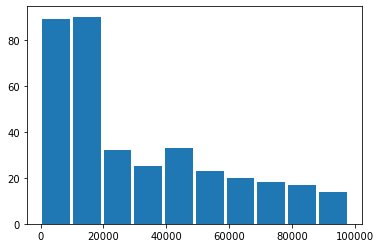

In [30]:
plt.hist(new_df['tt'], bins=10, rwidth=0.9)
plt.show()

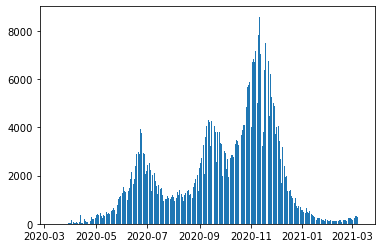

In [20]:
plt.bar(new_df['date'], new_df['dl'])
plt.show()

In [31]:
import seaborn as sns

<AxesSubplot:xlabel='dl', ylabel='Count'>

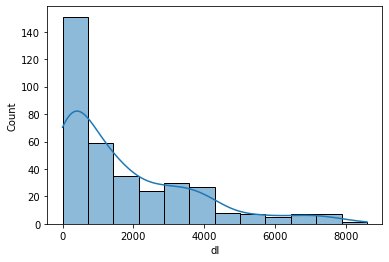

In [34]:
# KDE - Kernel Density Estimate
sns.histplot(new_df['dl'], kde=True)

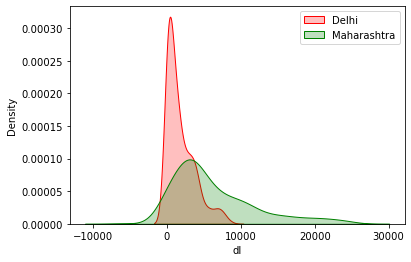

In [42]:
# 1D KDE Plot
sns.kdeplot(new_df['dl'], color='r', shade=True, label='Delhi')
sns.kdeplot(new_df['mh'], color='g', shade=True, label='Maharashtra')
plt.legend()
plt.show()

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


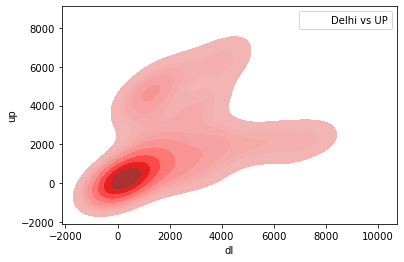

In [45]:
sns.kdeplot(new_df['dl'], new_df['up'], color='r', shade=True, label='Delhi vs UP')
plt.legend()
plt.show()

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


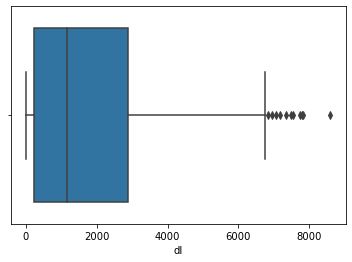

In [55]:
# Whisker's plot
sns.boxplot(new_df['dl'])
plt.show()

In [51]:
new_df['dl'].quantile(0.25)

240.0

In [52]:
new_df['dl'].quantile(0.75)

2871.0

In [70]:
Q1 = new_df['dl'].quantile(0.25)
Q3 = new_df['dl'].quantile(0.75)

IQR = Q3 - Q1

In [71]:
IQR

2282.0

In [72]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [73]:
lower, upper

(-3196.0, 5932.0)

In [74]:
new_df['dl'] = new_df[new_df['dl'] < upper]['dl']

<ipython-input-74-08302dd22584>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dl'] = new_df[new_df['dl'] < upper]['dl']


F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


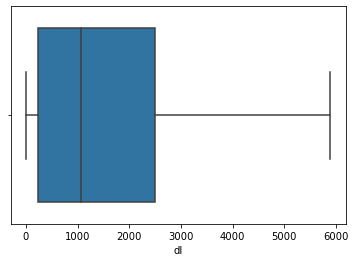

In [75]:
# Whisker's plot
sns.boxplot(new_df['dl'])
plt.show()

In [76]:
new_df['dl'] = new_df[new_df['dl'] > lower]['dl']

<ipython-input-76-580566ee539b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dl'] = new_df[new_df['dl'] > lower]['dl']


F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


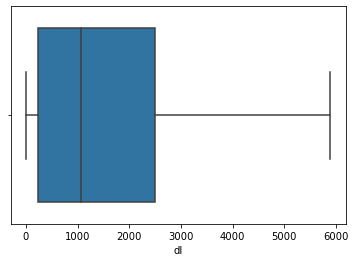

In [77]:
# Whisker's plot
sns.boxplot(new_df['dl'])
plt.show()